# Part I - (Prosper Loan Dataset Exploration)
## by Sakthi

## Introduction
> I am going to work with ProsperLoanData

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df_copy = df.copy() # Creating a copy of dataframe. I will work with 
                    # copy rather than the original

In [6]:
df_copy.shape

(113937, 81)

### What is the structure of your dataset?

> The dataset contains 113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are "LoanStatus" "ProsperRating (numeric)" and "ProsperScore" 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The Term will help to build relationship between LoanStatus, ProsperRating (numeric), ProsperScore. The Term represented in months facilitate bi variate and multi variate relationship

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Q1. What are the numeric values? plot the same.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

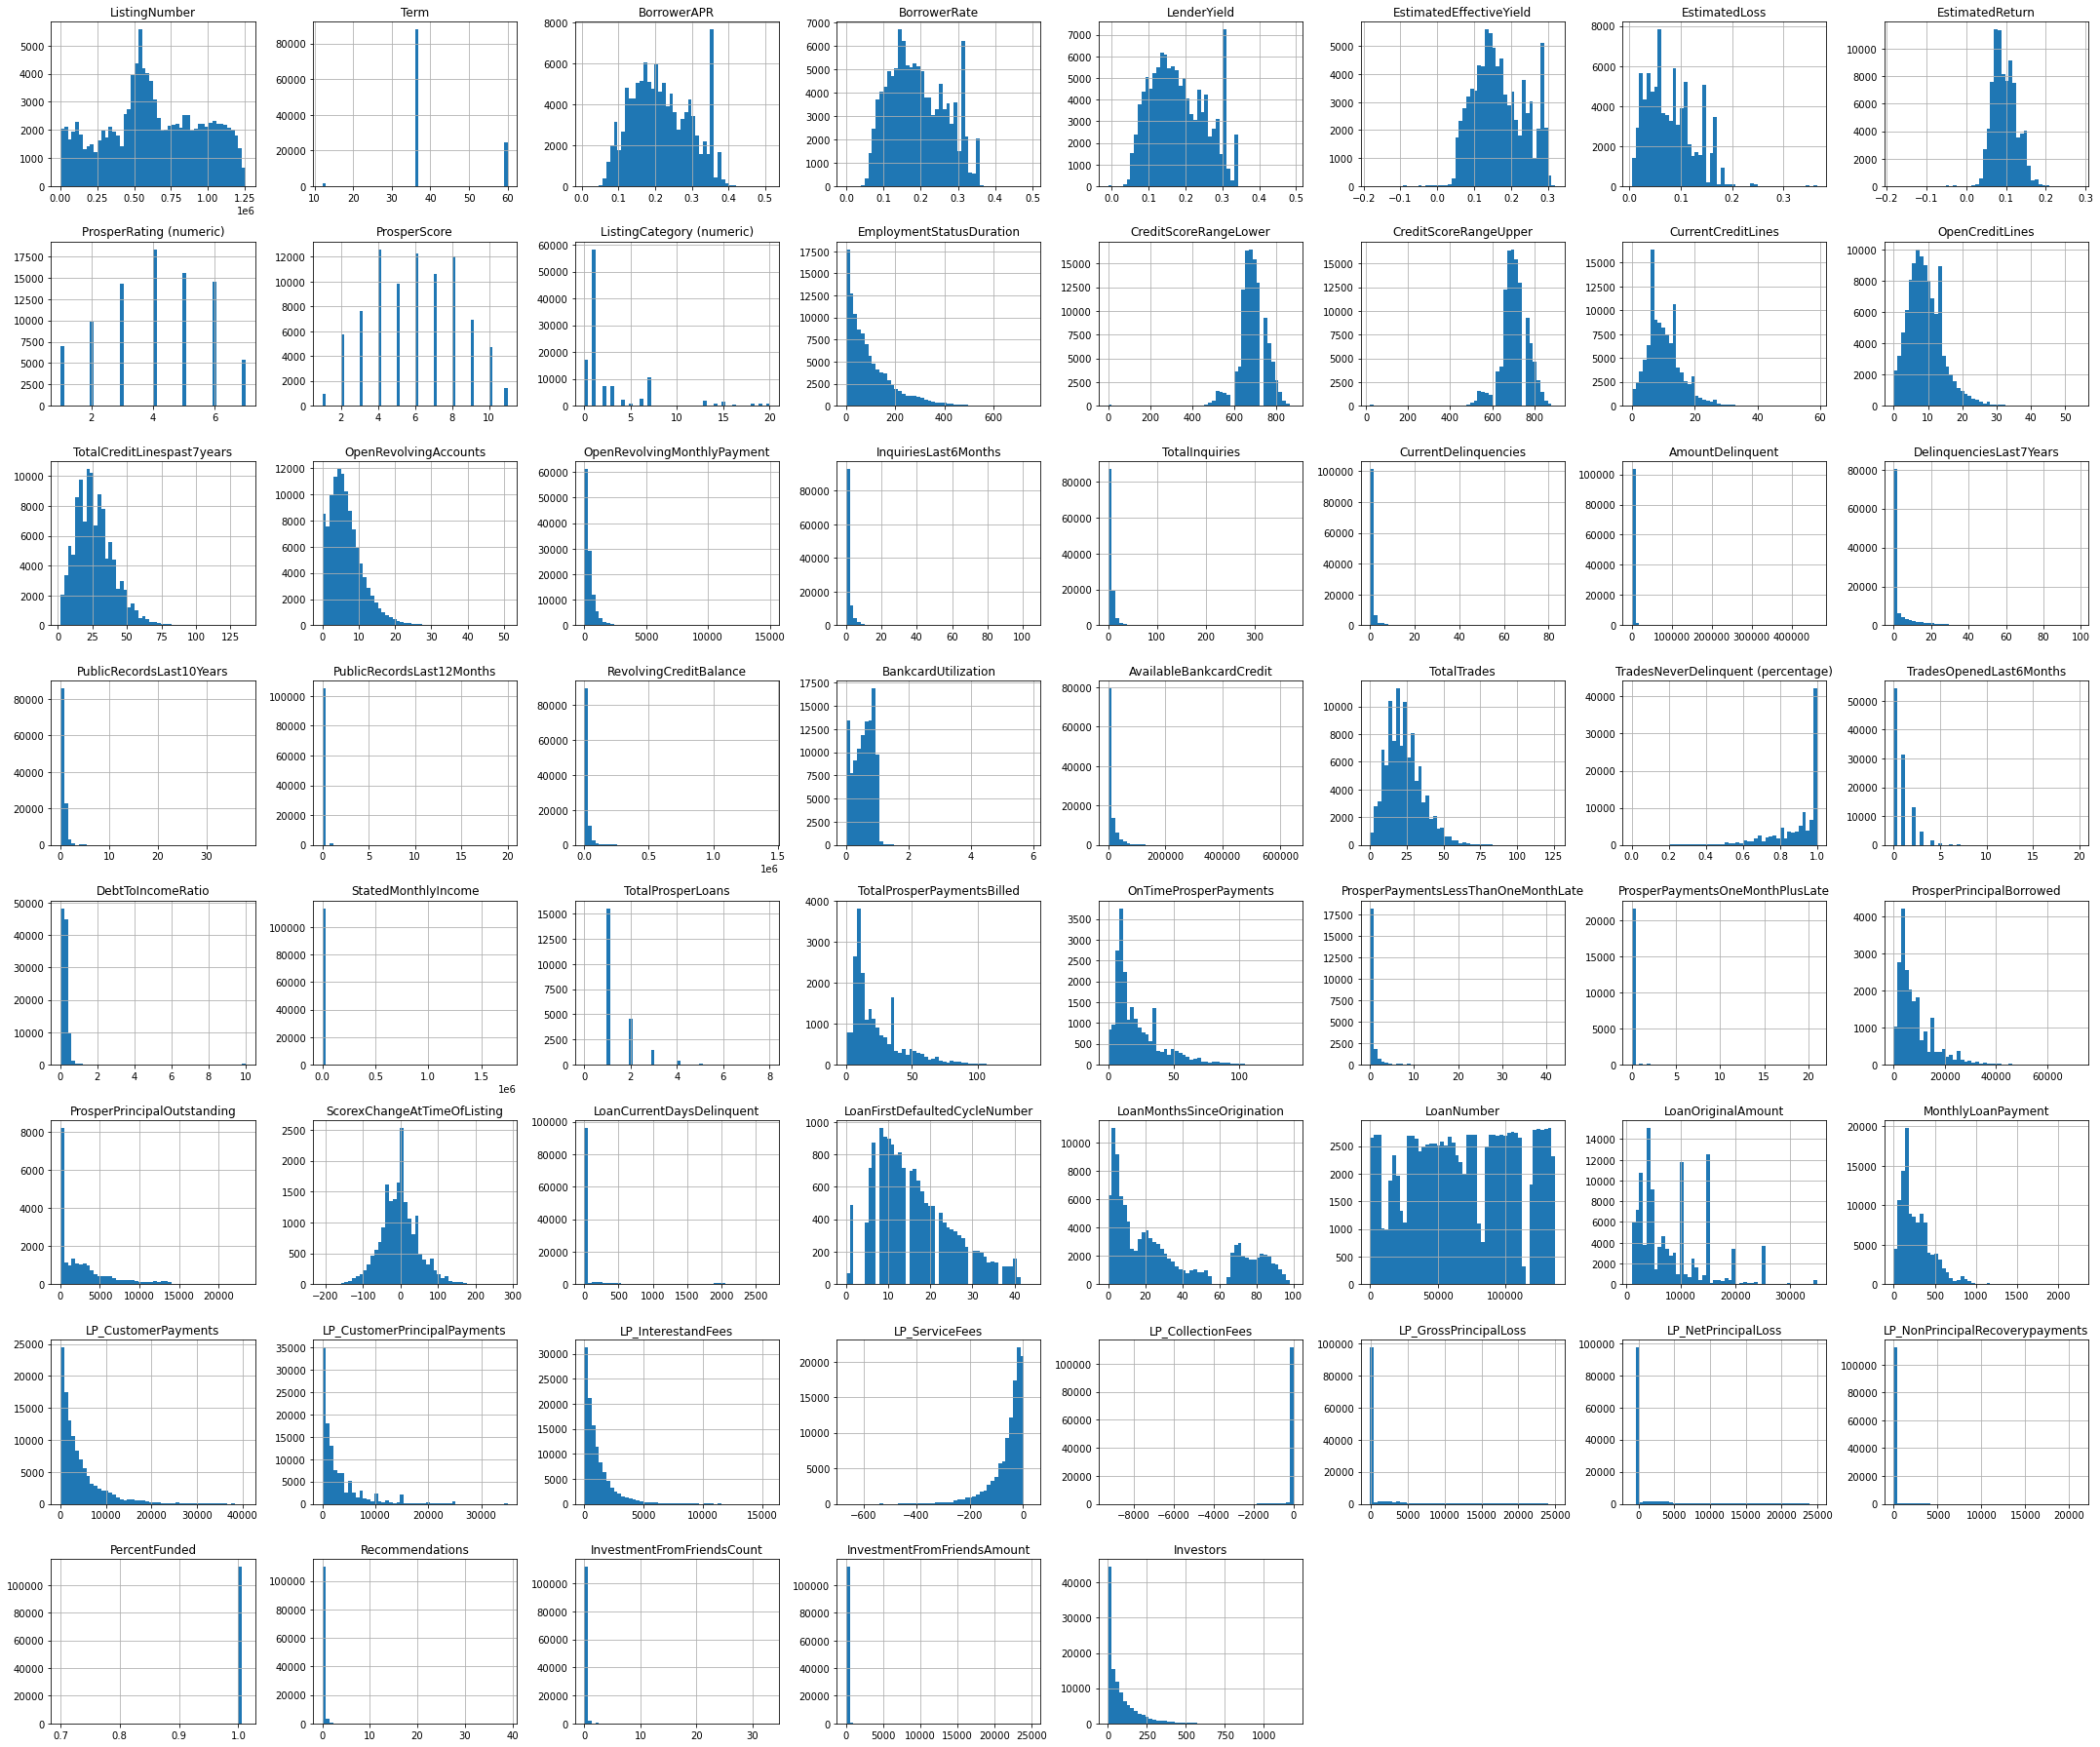

In [7]:
# using hist() to quickly plot the features containing numerical values
df_copy.hist(bins = 50, figsize=(30,25))
plt.tight_layout(); # Have set a figsie and used tight_layout(). Have ensured there is no overlap. 
                    # Enlarge the image for more visibility

### Observation

Most of the features containing numerical values are tail heavy as per the histograms

### Q2. What is the ratio of various loan status?

In [8]:
## I use bar chart with proportions to visualize the Loan status
loan_status_count = df_copy['LoanStatus'].value_counts()

In [9]:
loan_status_count

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [10]:
loan_status_total = df_copy['LoanStatus'].value_counts().sum()

In [11]:
loan_status_total

113937

In [12]:
loan_status_index = df_copy['LoanStatus'].value_counts().index

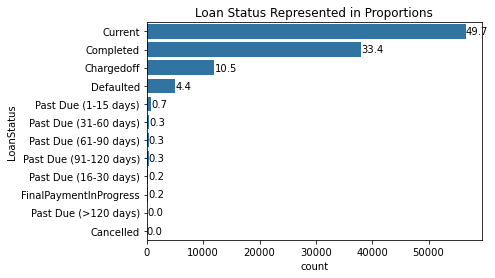

In [13]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_copy, y='LoanStatus', color=base_color, order=loan_status_index)
plt.title("Loan Status Represented in Proportions")

# Logic to print the propotion text on the bars
for i in range(loan_status_count.shape[0]): 
    count = loan_status_count[i]
    # convert count into percentage and then into string
    pct_string = '{:0.1f}'.format(100 * count / loan_status_total)
    # Print the string value on the bar
    plt.text(count+1, i, pct_string, va='center')

### Observation


- The current loan status is 49.7%
- The completed loan status is 33.4%
- The chargedoff loan is 10.5%
- The defaulted loan is 4.4%

###  Q3. What are the various loan terms?

In [14]:
df['Term'].value_counts() # using value_counts to find out 'Term' (months) and it's count

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [15]:
term_index = df['Term'].value_counts().index # Getting the index of term

In [16]:
term_index

Int64Index([36, 60, 12], dtype='int64')

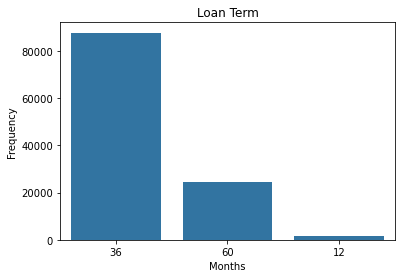

In [17]:
# Plotting the loan term and frequency
count, ax = plt.subplots()
ax = sb.countplot(data = df_copy, x='Term', color=base_color, order=term_index)
ax.set_title("Loan Term")
ax.set_xlabel('Months')
ax.set_ylabel('Frequency');

### Observation

> The 36 month term is the highest followed by 60 months and 12 months

### Q4. Plot the Count of Null 

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [19]:
# Dropping the columns without any null and stroing the columns with null in na_counts
na_counts = df_copy.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate',
                         'Term', 'LoanStatus', 'BorrowerRate', 'LenderYield',
                         'ListingCategory (numeric)', 'IsBorrowerHomeowner',
                         'CurrentlyInGroup', 'DateCreditPulled', 
                         'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
                         'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
                         'LoanKey', 'LoanCurrentDaysDelinquent',
                         'LoanMonthsSinceOrigination', 'LoanNumber',
                         'LoanOriginalAmount', 'LoanOriginationDate',
                         'LoanOriginationQuarter', 'MemberKey',
                         'MonthlyLoanPayment', 'LP_CustomerPayments',
                         'LP_CustomerPrincipalPayments', 'LP_InterestandFees',
                         'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss',
                         'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments',
                         'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount',
                         'InvestmentFromFriendsAmount', 'Investors'], axis=1).isna().sum() 

In [20]:
na_counts

CreditGrade                             84984
ClosedDate                              58848
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
FirstRecordedCreditLine                   697
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
TotalInquiries                    

/home/sakthi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


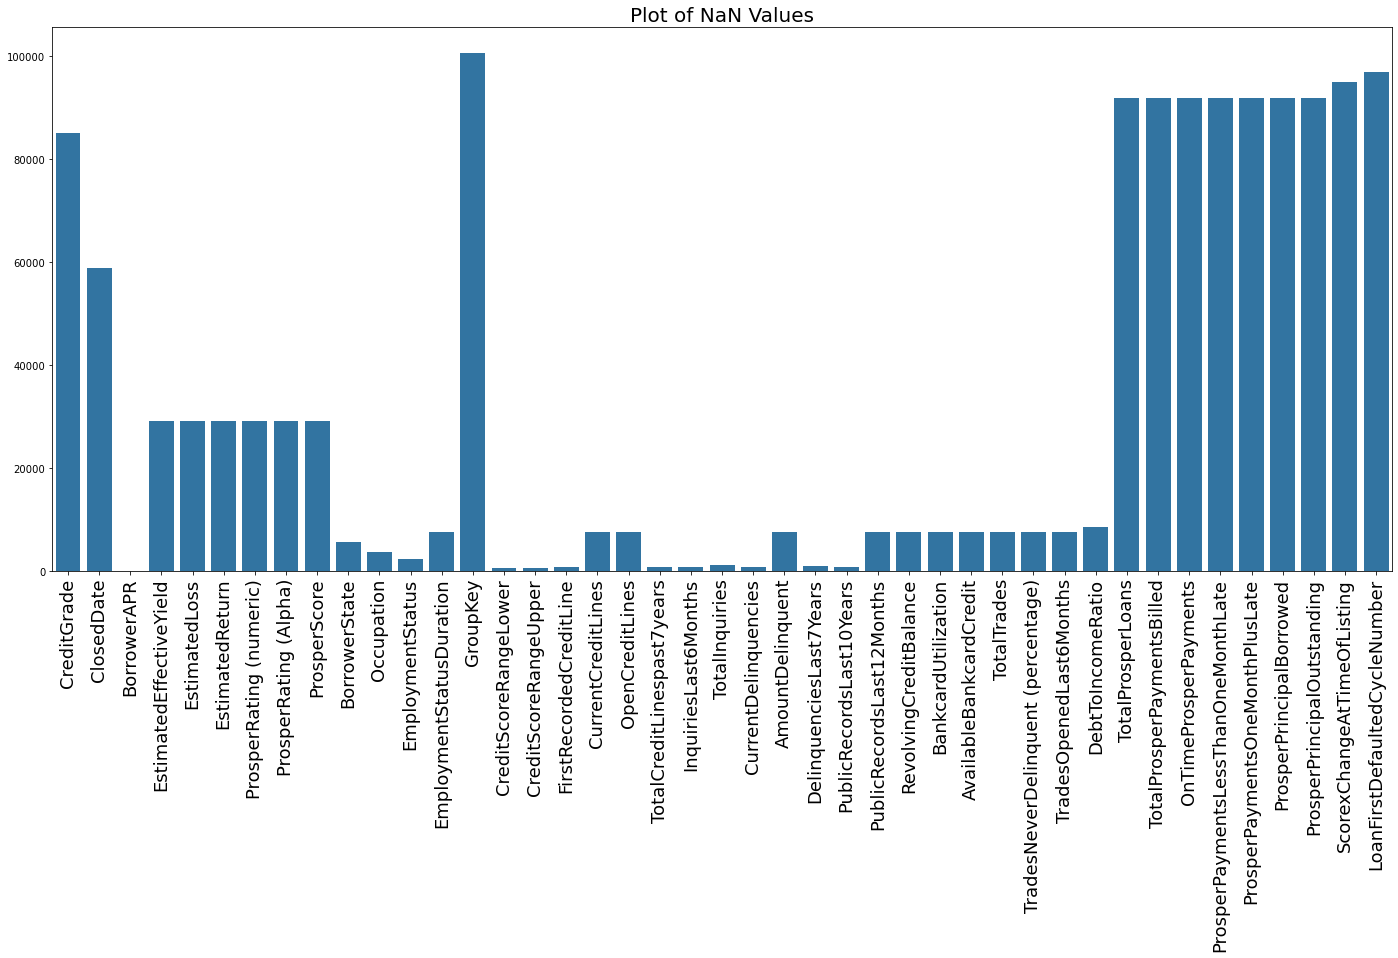

In [21]:
plt.figure(figsize=(24,10))
sb.barplot(na_counts.index.values, na_counts, color=base_color)
plt.title('Plot of NaN Values', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 18);

### Observation

> Almost 50% of the features have NaN or Null values. I choose not to remove the Nan

### Q5 . What is the distribution of ProsperScore is Like?

In [22]:
df_copy['ProsperScore'].value_counts() 

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [23]:
df_copy['ProsperScore'].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

In [24]:
df_copy['ProsperScore'] = df_copy['ProsperScore'].fillna(0) # Filling NaN with 0

In [25]:
df_copy['ProsperScore'].describe()

count    113937.00000
mean          4.43123
std           3.30703
min           0.00000
25%           0.00000
50%           5.00000
75%           7.00000
max          11.00000
Name: ProsperScore, dtype: float64

In [26]:
df_copy['ProsperScore'] = df_copy['ProsperScore'].astype(int)

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [28]:
## The 'ProsperScore' is changed to int

In [29]:
df_copy['ProsperScore'].describe()

count    113937.00000
mean          4.43123
std           3.30703
min           0.00000
25%           0.00000
50%           5.00000
75%           7.00000
max          11.00000
Name: ProsperScore, dtype: float64

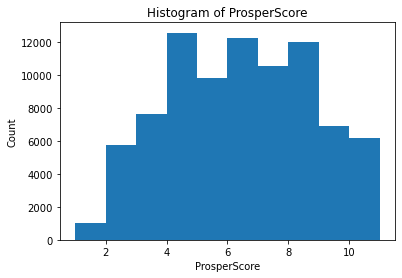

In [30]:
bins = np.arange(1, df_copy['ProsperScore'].max()+1, 1)
plt.title("Histogram of ProsperScore")
plt.hist(data = df_copy, x='ProsperScore', bins=bins)
plt.xlabel('ProsperScore');
plt.ylabel('Count');

### Observation

> The ProsperScore is almost a normal distribution

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I transfored the 'LoanStatus to proportions. In 'LoanStatus' current loan is at higher rate 49.7%. The 36 month 'Term' is the highest. The 'ProsperSore' forms almost a bell curve distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I changed the data type of ProsperScore from float to int. 
- I filled in the null values with 0 before transforming the data from float to int
- While using np.arange to create bins I omitted the value for 0 since it's not a ProsperScore

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

###  Q6. What is the Relationship between Prosper Score and Term?

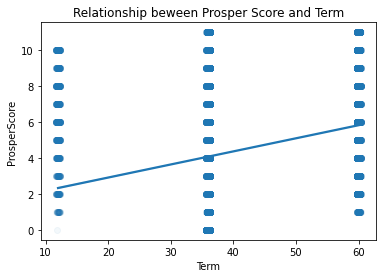

In [31]:
# Using seaborn regplot to find the relationship between 'Term' and 'ProsperScore'
sb.regplot(data = df_copy, x='Term', y='ProsperScore', x_jitter=0.3, scatter_kws={
    'alpha':1/20}); # Setting jitter value of 0.3 and alpha : 1/20
plt.title('Relationship beween Prosper Score and Term')
plt.xlabel('Term');
plt.ylabel('ProsperScore');

### Observation

The ProsperScore and Term form a linear relationship. However there is no strong corelation.

### Q7. What is the Relationship between Term and Total Prosper Loans?

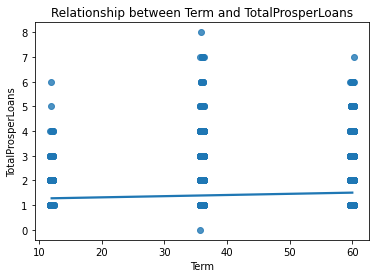

In [32]:
# USing seaborn regplot to find the relationship between Term and TotalProsperLoans
sb.regplot(data = df_copy, x = 'Term', y = 'TotalProsperLoans', x_jitter=0.3);
plt.title('Relationship between Term and TotalProsperLoans');

### Observation

> The relationship beween Term and TotalProsperLaons is linear. However there is no strong corelation

### Q8. What is the Relationship Between Total Prosper Loans and Total Inquiries?

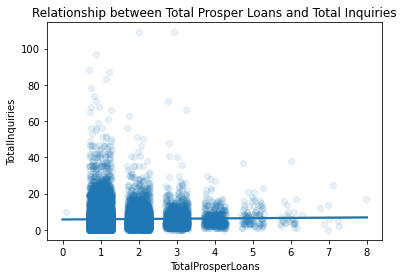

In [33]:
# Using seaborn regplot to find the relationship between 'TotalInquiries and TotalProsperLoans'
sb.regplot(data = df_copy, y = 'TotalInquiries', x='TotalProsperLoans', x_jitter = 0.3, scatter_kws={'alpha':1/10});
plt.title('Relationship between Total Prosper Loans and Total Inquiries');

Observation 
> The relationship between Total Inquiries and Total Prosper Loan is linear. But there is no strong correlation

### Q9. What is the relationship between ProsperScore and ProsperRating (numeric) ?

In [34]:
df_copy['ProsperRating (Alpha)'].sample(10) # Listing sample 'ProsperRating (Alpha)'

21123       C
46779     NaN
66916       B
53548     NaN
45337       C
109910      B
112997    NaN
104990      E
34743       D
19987     NaN
Name: ProsperRating (Alpha), dtype: object

In [35]:
df_copy['ProsperRating (numeric)'].sample(10) # Listing 'ProsperRating (numeric) sample

4423      2.0
101730    4.0
57318     4.0
68475     3.0
111836    4.0
4113      1.0
108264    7.0
55630     5.0
68501     7.0
72090     4.0
Name: ProsperRating (numeric), dtype: float64

In [36]:
df_copy['ProsperScore'].sample(10) # Listing ProsperScore sample

52879      3
67227     10
93032      9
103127     9
105063     5
109479     4
58452      8
103264     5
25085      3
29913      2
Name: ProsperScore, dtype: int64

In [37]:
# Filling the 'ProsperRating (numeric) na with zero'
df_copy['ProsperRating (numeric)'] = df_copy['ProsperRating (numeric)'].fillna(0) 

In [38]:
# Changing the 'ProsperRating (numeric) from float to int'
df_copy['ProsperRating (numeric)'] = df_copy['ProsperRating (numeric)'].astype(int)

In [39]:
df_copy['ProsperRating (numeric)'].sample(10)

67676     3
95384     0
68940     2
68641     1
7561      0
106626    0
82795     7
44379     5
18930     0
49448     2
Name: ProsperRating (numeric), dtype: int64

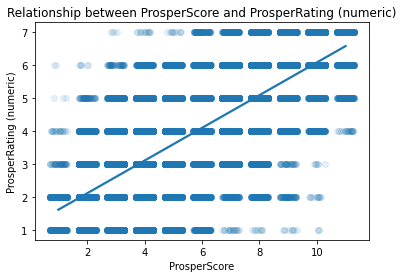

In [40]:
# Using regplot to find the relationship between 'ProsperScore and ProsperRating (numeric)
sb.regplot(data = df, x = 'ProsperScore', y = 'ProsperRating (numeric)', x_jitter=0.3, scatter_kws={'alpha':1/10});
plt.title('Relationship between ProsperScore and ProsperRating (numeric)');

### Observation
> The ProsperScore and ProseperRating (numeric) are strongly related. Higher the prosperScore higher the ProsperRating (numeric)

### Q10. What is the relationship between LoanStatus and ProsperScore

In [41]:
df_copy['LoanStatus'].value_counts().index # Printing the index of 'LoanStatus'

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled'],
      dtype='object')

In [42]:
loan_status = ['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled']
loan_status_categorical = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status)

# Making a new column 'LoanStatusCategorical that holds LoanStatus, which are of object type'
df_copy['LoanStatusCategorical'] = df_copy['LoanStatus'].astype(loan_status_categorical)

In [43]:
df_copy.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanStatusCategorical
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Completed
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Current
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Completed
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Current
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Current


In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  object  
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   object  
 4   Term                                 113937 non-null  int64   
 5   LoanStatus                           113937 non-null  object  
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113912 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

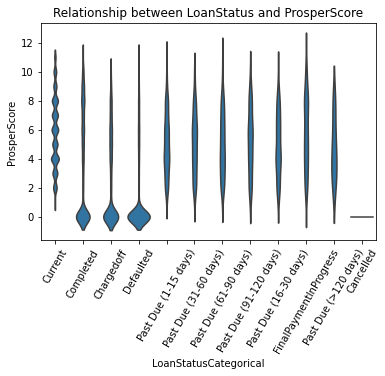

In [45]:
sb.violinplot(data = df_copy, x = 'LoanStatusCategorical', y = 'ProsperScore', 
              color = base_color, inner = None)
plt.xticks(rotation = 60);
plt.title("Relationship between LoanStatus and ProsperScore");

### Plotiing Box Plot for better understanding

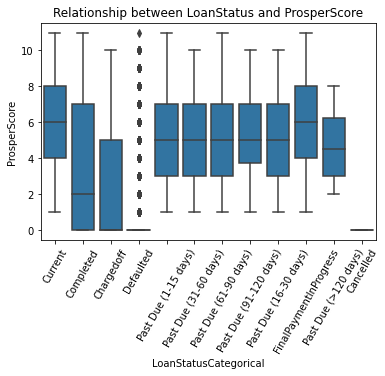

In [46]:
sb.boxplot(data = df_copy, x = 'LoanStatusCategorical', y = 'ProsperScore',
          color = base_color);
plt.xticks(rotation = 60);
plt.title("Relationship between LoanStatus and ProsperScore");

### Observation



> Loan Status Current and Completed have higher prosper score than the rest of LoanStatus.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Changed the LoanStatus to categorical. Plotted against LoanStatusCategorical and ProsperScore. Loan status 'Current' and 'Completed' have higher prosper score

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between 'TotalInquires' and 'TotalProsperLoans' indicates a linear relationship. Some inquiries resulted into loans
> The 'ProsperScore' and 'ProsperRating (numeric)' indicates a strong relationship

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Q11. What is the distribution of ProsperScore and ProsperRating (numeric) based on Loan Status ?

/home/sakthi/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


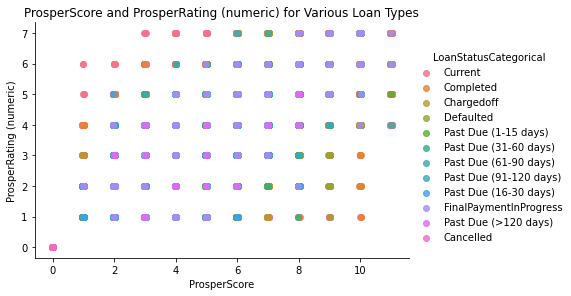

In [47]:
# Making use of FacetGrid to plot ProsperScore, 'ProsperRating (numeric), and 'LoanStatusCategorical'

g = sb.FacetGrid(data = df_copy, hue = 'LoanStatusCategorical', size = 4, aspect = 1.5)
g.map(sb.regplot, 'ProsperScore', 'ProsperRating (numeric)', x_jitter = 0.03, fit_reg = False);
g.add_legend()
plt.xlabel('ProsperScore')
plt.ylabel('ProsperRating (numeric)');
plt.title("ProsperScore and ProsperRating (numeric) for Various Loan Types");

### Observation

> The distribution is similar to ProsperScore and ProsperRating in addition to LoanStatus which are represented in various colors

### Q12. What is the relationship bettwen Term, ProsperScore and LoanStatus ?

/home/sakthi/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


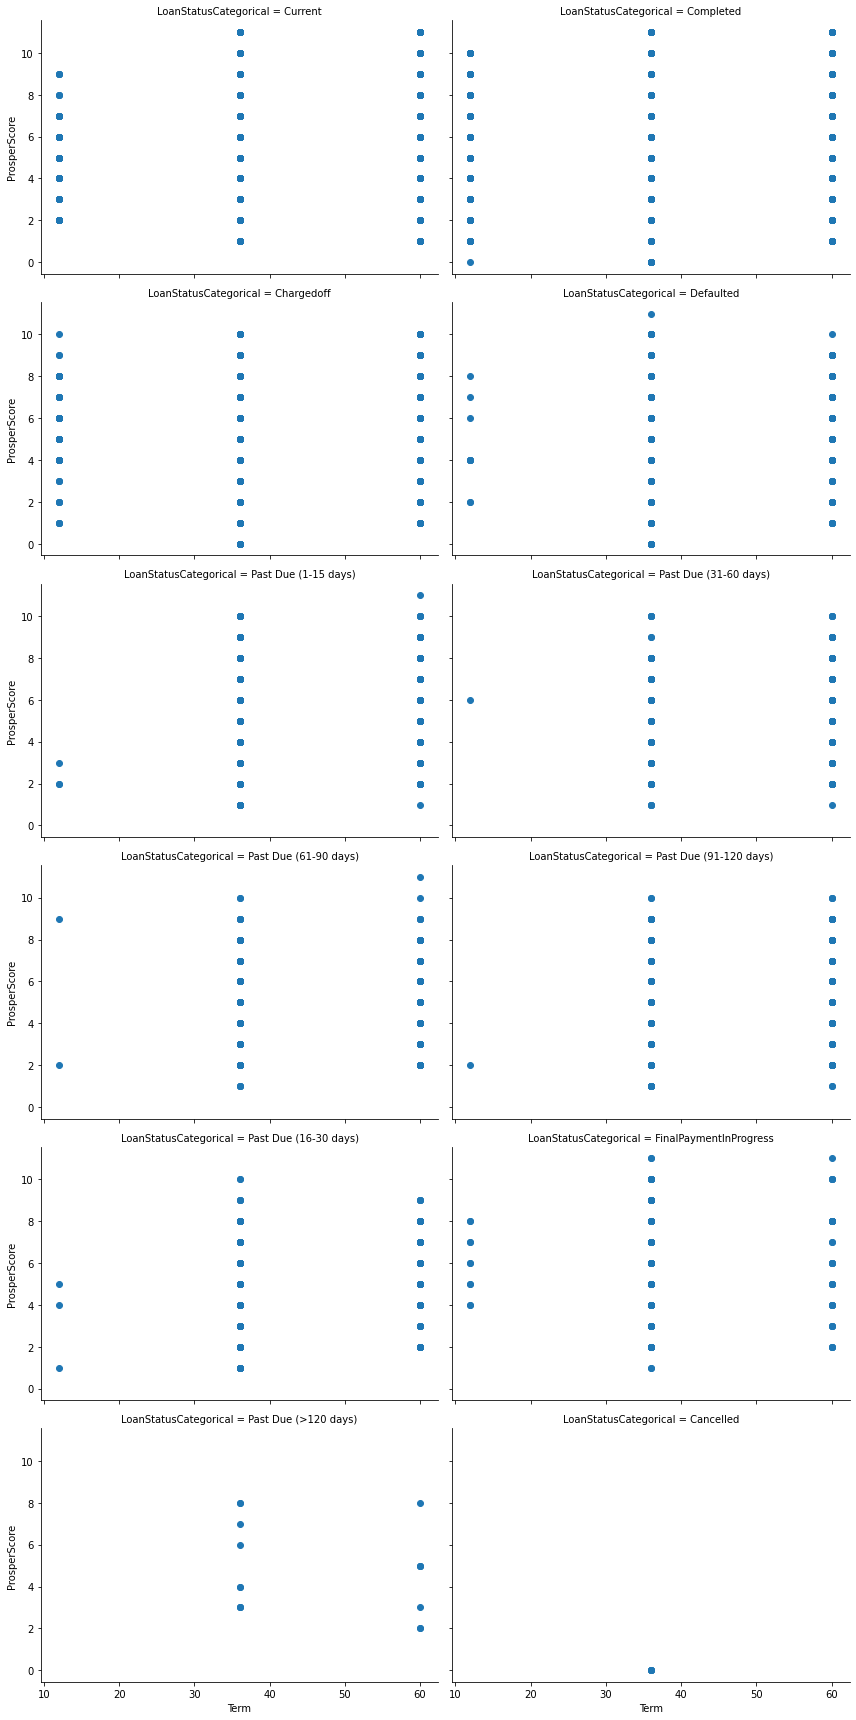

In [48]:
# Using FacetGrid and scatter plot to see the relationship between Term, ProsperScore, and LoanStatus
g = sb.FacetGrid(data = df_copy, col = 'LoanStatusCategorical', size =4, aspect = 1.5, col_wrap =2)
g.map(plt.scatter, 'Term','ProsperScore');

### Observation

> The loan status is split in uniform manner against Term and ProsperScore. The highest term is 36 months.

### Q13.  What is the relationship between EstimatedLoss, ProsperScore, and LoanStatus

In [49]:
df_copy['EstimatedLoss'].sample(10)

23635     0.1275
18875     0.1125
24177     0.0674
11797     0.0549
65973        NaN
109104    0.0260
29578     0.0599
8919      0.0210
103818    0.0100
84328     0.0380
Name: EstimatedLoss, dtype: float64

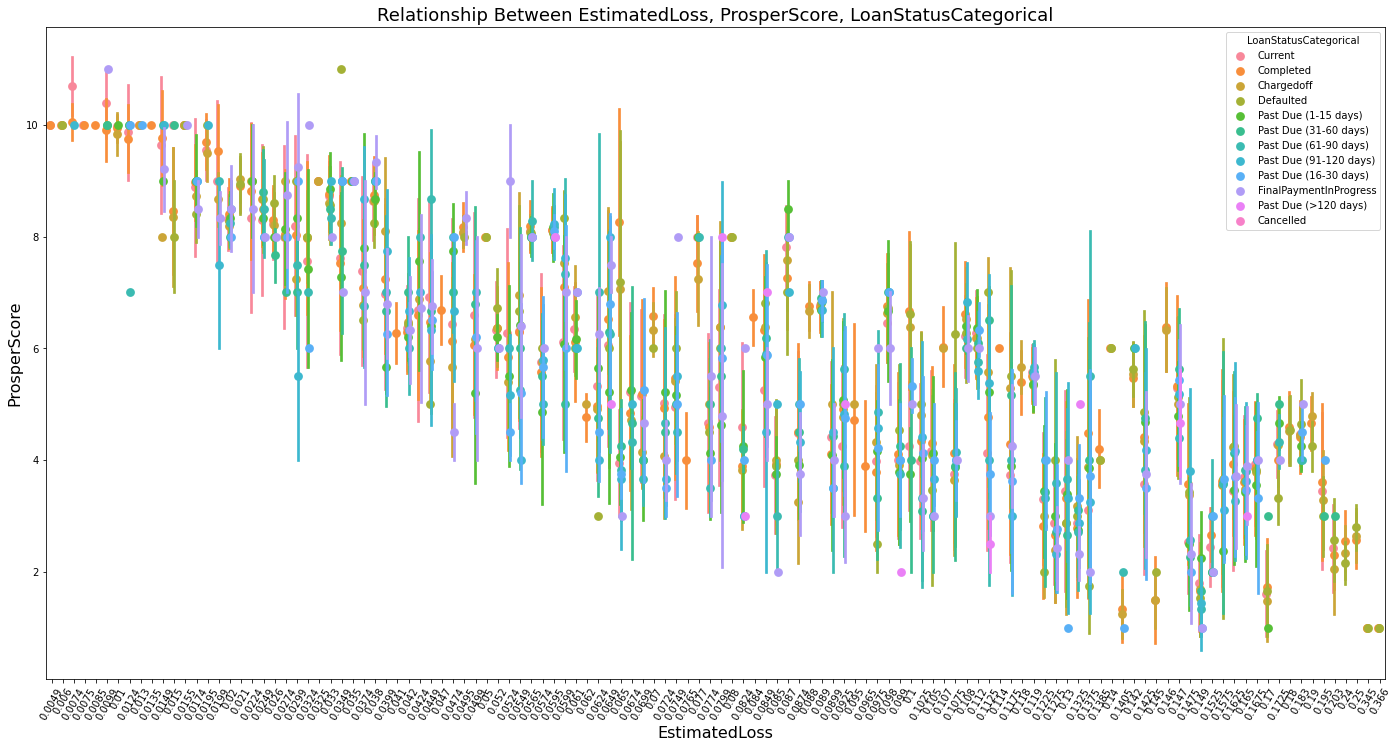

In [50]:
# Using pointplot to see the relationship between 'EstimatedLoss' 'ProsperScore' and 'LoanStatusCategorical'
plt.figure(figsize=(24,12))
sb.pointplot(data = df_copy, x='EstimatedLoss', y='ProsperScore', hue = 'LoanStatusCategorical', ci ='sd',
          linestyles = " ",dodge = True)
plt.xticks(rotation = 60)
plt.title('Relationship Between EstimatedLoss, ProsperScore, LoanStatusCategorical', fontsize = 18)
plt.xlabel('EstimatedLoss', fontsize = 16)
plt.ylabel('ProsperScore', fontsize=16);

### Observation

- The current, completed loan status is plotted against low estimated loss and high 'ProsperScore'. 
- The loans past due date has higher 'EstimatedLoss' and lower 'ProsperScore' as compared with 'Current' and 'Completed 
- The estimated loss is inversely proportional to prosper score.

### Q14. What is the relationship between ProsperScore, ProsperRating, Term, ListingCategory (numeric)

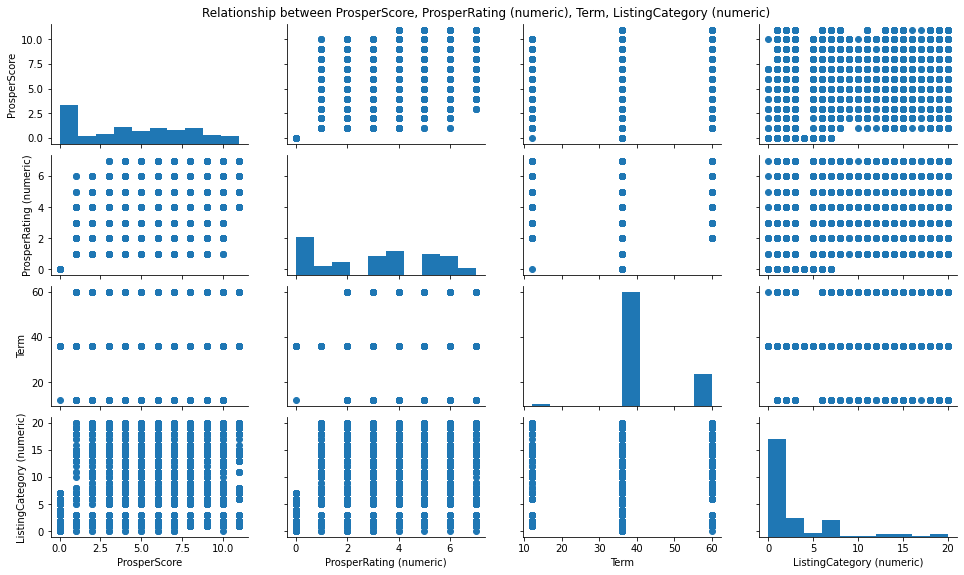

In [51]:
# Using PairGrid to see the relationship between the columns 'ProsperScore', 'ProsperRating (numeric)', 'Term',
# 'ListingCategory (numeric)'

variables = ['ProsperScore', 'ProsperRating (numeric)', 'Term', 'ListingCategory (numeric)']
g = sb.PairGrid(data = df_copy, vars = variables)
g= g.map_offdiag(plt.scatter)
g.fig.set_size_inches(14, 8);

# Refernce material to set the title 
# https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot)

g.fig.subplots_adjust(top = 0.95)
g.fig.suptitle('Relationship between ProsperScore, ProsperRating (numeric), Term, ListingCategory (numeric)')

g.map_diag(plt.hist);


In [52]:
df_copy[variables].corr()

,ProsperScore,ProsperRating (numeric),Term,ListingCategory (numeric)
ProsperScore,1.000000,0.884563,0.229886,0.174836
ProsperRating (numeric),0.884563,1.000000,0.258349,0.122355
Term,0.229886,0.258349,1.000000,0.004947
ListingCategory (numeric),0.174836,0.122355,0.004947,1.000000


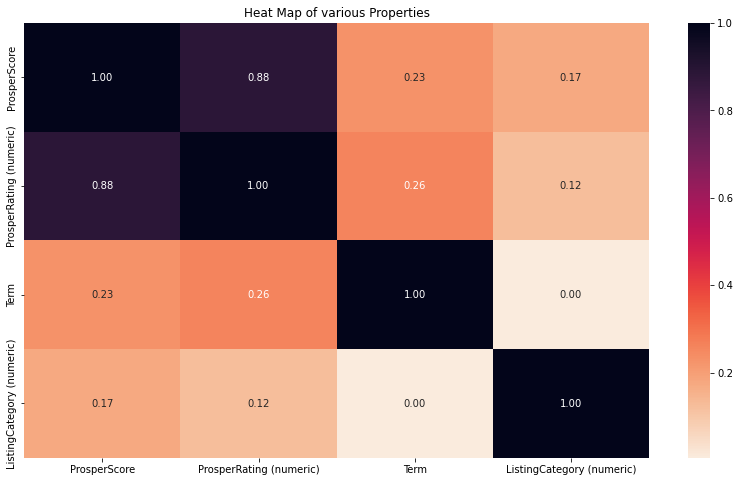

In [53]:
plt.figure(figsize=[14,8]);
plt.title("Heat Map of various Properties");

sb.heatmap(df_copy[variables].corr(), cmap='rocket_r', annot = True, fmt = '.2f');


### Observation

> As figured out in Q9, the ProsperScore and ProsperRating (numeric) has a strong co relation. The co relation coefficient is 0.88 for ProsperScore and ProsperRating (numeric)
<br>
> Further, there is no strong relationship between ListingCategory, Term.
<br>
> Everything except ProsperScore and ProsperRating (numeric) is dependent on behaviour of customer. The prosper score and rating are the result of the rules based on which the values are stored.
<br>
The prosper score being 10 is the highest, meaning it is the best possible score.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The 'Term' helped in depicting the ProsperScore and ProsperRating(numeric). The Term along with other variables helped in finding the relationship

### Were there any interesting or surprising interactions between features?

> Only ProsperScore and ProsperRating (numeric) have the strongest co relation. This suggests that LoanStatus 'current' and 'completed' have highest prosper score.

## Conclusions
- The data is vast. I explored the data on basis of "LoanStatus", "ProsperScore", "ProsperRating (numeric)", "Term"
- There is strong co relation between "ProsperScore" and "ProsperRating (numeric)"
- Since higher prosper score indicates risk free loan, LoanStatus current and completed have strong co relation with ProsperScore
